In [1]:
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import numpy as np
import tensorflow as tf 

import joblib

from pydantic import BaseModel

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=[
        "#4B9AC7",
        "#4BE8E0",
        "#9DD4F3",
        "#97FBF6",
        "#2A7FAF",
        "#23B1AB",
        "#0E3449",
        "#015955",
    ]
)
pio.templates.default = "jedha"

In [2]:
df_pricing = pd.read_csv("src/get_around_pricing_project.csv")

In [3]:
df_pricing.head()

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [4]:
df_pricing.drop("Unnamed: 0", axis=1, inplace=True)

In [5]:
df_pricing.describe(include="all")

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


In [6]:
df_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   model_key                  4843 non-null   object
 1   mileage                    4843 non-null   int64 
 2   engine_power               4843 non-null   int64 
 3   fuel                       4843 non-null   object
 4   paint_color                4843 non-null   object
 5   car_type                   4843 non-null   object
 6   private_parking_available  4843 non-null   bool  
 7   has_gps                    4843 non-null   bool  
 8   has_air_conditioning       4843 non-null   bool  
 9   automatic_car              4843 non-null   bool  
 10  has_getaround_connect      4843 non-null   bool  
 11  has_speed_regulator        4843 non-null   bool  
 12  winter_tires               4843 non-null   bool  
 13  rental_price_per_day       4843 non-null   int64 
dtypes: bool(

In [7]:
px.box(df_pricing, x="mileage")

In [8]:
df_pricing[df_pricing["mileage"] == df_pricing["mileage"].min()]

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
2938,Renault,-64,230,diesel,black,sedan,True,True,False,True,False,False,True,274


In [9]:
df_pricing["mileage"] = df_pricing["mileage"].clip(lower=0)

In [10]:
px.box(df_pricing, x="engine_power")

In [11]:
df_pricing[df_pricing["engine_power"] == 0]

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
3765,Nissan,81770,0,diesel,white,suv,False,False,False,False,False,False,False,108


In [12]:
px.box(df_pricing, x="rental_price_per_day")

In [13]:
df_pricing[df_pricing["rental_price_per_day"] == 10]

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
565,Citroën,179358,120,diesel,black,estate,False,True,False,False,False,False,True,10
630,Peugeot,147558,105,diesel,white,estate,False,True,False,False,False,False,False,10
879,Peugeot,134156,105,diesel,grey,estate,False,True,False,False,False,False,False,10
1255,Citroën,170381,135,diesel,silver,estate,True,True,False,False,False,False,True,10
1832,BMW,174524,85,diesel,blue,hatchback,False,True,False,False,False,False,True,10
2829,Audi,439060,105,diesel,silver,sedan,False,False,True,False,False,False,True,10
4356,BMW,79685,190,diesel,black,suv,False,False,False,False,False,False,False,10


In [14]:
df_pricing[df_pricing["rental_price_per_day"] == 422]

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
4753,BMW,72515,135,diesel,blue,suv,False,False,True,False,False,False,False,422


In [15]:
def handle_outlier(series, method = "remove") :
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - IQR * 1.5
    upper_bound = Q3 + IQR * 1.5
    if method == "clip" :
        return series.clip(lower=lower_bound,upper=upper_bound)
    elif method == "median":
        median = series.median()
        return series.apply(lambda x : median if x < lower_bound or x > upper_bound else x)
    elif method == "mean":
        mean = series.mean()
        return series.apply(lambda x : mean if x < lower_bound or x > upper_bound else x)
    else :
        return series[(series >= lower_bound) & (series <= upper_bound)].copy()
    
df_clip = df_pricing.apply(lambda x : handle_outlier(x, "clip") if x.dtype == 'int64' else x)
df_median = df_pricing.apply(lambda x : handle_outlier(x, "median") if x.dtype == 'int64' else x)
df_mean = df_pricing.apply(lambda x : handle_outlier(x, "mean") if x.dtype == 'int64' else x)
df_no_outliers = df_pricing.apply(lambda x : handle_outlier(x) if x.dtype == 'int64' else x)
df_no_outliers = df_no_outliers[df_no_outliers["rental_price_per_day"].notna()]

In [16]:
target_variable = "rental_price_per_day"
def get_preprocessor(X) :
    numeric_features = []
    categorical_features = []
    for i, t in X.dtypes.items():
        if ("float" in str(t)) or ("int" in str(t)):
            numeric_features.append(i)
        else:
            categorical_features.append(i)
    
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')), 
        ('scaler', StandardScaler())
    ])
    categorical_transformer = OneHotEncoder(
        drop="first"
    )  
    preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
        ])
    
    return preprocessor

def preprocess_data(df) :
    X = df.drop(target_variable, axis=1)
    y = df.loc[:,target_variable]

    preprocessor = get_preprocessor(X)
    
    X = preprocessor.fit_transform(X)
    return train_test_split(X, y, test_size=0.2, random_state=24)

def test_data(df) :
    X_train, X_test, y_train, y_test = preprocess_data(df)
    model = LinearRegression()

    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("R2 score on training set : ", r2_score(y_train, y_train_pred))
    print("R2 score on test set : ", r2_score(y_test, y_test_pred))

In [17]:
for (k, df) in {"df_pricing" : df_pricing, "df_clip" : df_clip, "df_median" : df_median, "df_mean" : df_mean, "df_no_outliers" : df_no_outliers}.items() :
    print(k)
    test_data(df)
    print()
    print(k + "removing model_key column")
    test_data(df.drop(["model_key"], axis=1))
    print()
    print(k + "removing fuel column")
    test_data(df.drop(["fuel"], axis=1))
    print()
    print(k + "removing paint_color column")
    test_data(df.drop(["paint_color"], axis=1))
    print()
    print(k + "removing car_type column")
    test_data(df.drop(["car_type"], axis=1))
    print()
    print()

df_pricing
R2 score on training set :  0.7093804850719223
R2 score on test set :  0.713881933050363

df_pricingremoving model_key column
R2 score on training set :  0.6685690739322186
R2 score on test set :  0.6856715314045143

df_pricingremoving fuel column
R2 score on training set :  0.6950957522980148
R2 score on test set :  0.7137474846594307

df_pricingremoving paint_color column
R2 score on training set :  0.7041902262815417
R2 score on test set :  0.7085004217134644

df_pricingremoving car_type column
R2 score on training set :  0.6951771225772103
R2 score on test set :  0.6993920007015944


df_clip
R2 score on training set :  0.7328563101130097
R2 score on test set :  0.7468914283745067

df_clipremoving model_key column
R2 score on training set :  0.690160986538313
R2 score on test set :  0.7082393479650362

df_clipremoving fuel column
R2 score on training set :  0.7230078865645229
R2 score on test set :  0.7349762968743292

df_clipremoving paint_color column
R2 score on traini

In [18]:
X_train, X_test, y_train, y_test = preprocess_data(df_clip)

In [21]:
svr = SVR()

param_grid_svr = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=5)

grid_search_svr.fit(X_train, y_train)

print(f'Best parameters for SVR: {grid_search_svr.best_params_}')
print(f'Best score for SVR: {grid_search_svr.best_score_}')
y_train_pred = grid_search_svr.predict(X_train)
y_test_pred = grid_search_svr.predict(X_test)
print("R2 score on training set : ", r2_score(y_train, y_train_pred))
print("R2 score on test set : ", r2_score(y_test, y_test_pred))


Best parameters for SVR: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best score for SVR: 0.7465512816868317
R2 score on training set :  0.8552613911921929
R2 score on test set :  0.7899912105353635


In [ ]:
rf = RandomForestRegressor(random_state=24)

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 0.7, 0.3]
}

grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5)

grid_search_rf.fit(X_train, y_train)

print(f'Best parameters for RandomForestRegressor: {grid_search_rf.best_params_}')
print(f'Best score for RandomForestRegressor: {grid_search_rf.best_score_}')
y_train_pred = grid_search_rf.predict(X_train)
y_test_pred = grid_search_rf.predict(X_test)
print("R2 score on training set : ", r2_score(y_train, y_train_pred))
print("R2 score on test set : ", r2_score(y_test, y_test_pred))


c:\Users\ad98\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning:

invalid value encountered in cast



Best parameters for RandomForestRegressor: {'max_depth': 20, 'max_features': 0.3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score for RandomForestRegressor: 0.7713166319984179
R2 score on training set :  0.965063642367146
R2 score on test set :  0.8047682047382647


In [21]:
Bagging_srv = BaggingRegressor(estimator=SVR(C=100,gamma='scale',kernel='rbf'), n_estimators=100)
Bagging_srv.fit(X_train,y_train)

y_train_pred = Bagging_srv.predict(X_train)
y_test_pred = Bagging_srv.predict(X_test)
print("R2 score on training set : ", r2_score(y_train, y_train_pred))
print("R2 score on test set : ", r2_score(y_test, y_test_pred))

R2 score on training set :  0.8556305852437661
R2 score on test set :  0.7930139799311761


In [24]:
xgb_model = XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=24
    )

xgb_model.fit(X_train, y_train)
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Evaluate
print("XGBRegressor R2 score on training set:", r2_score(y_train, y_train_pred))
print("XGBRegressor R2 score on test set:", r2_score(y_test, y_test_pred))

XGBRegressor R2 score on training set: 0.8520866632461548
XGBRegressor R2 score on test set: 0.8012675046920776


In [19]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search_XGBR = GridSearchCV(XGBRegressor(random_state=24), param_grid, cv=5, scoring='r2')
grid_search_XGBR.fit(X_train, y_train)
y_train_pred = grid_search_XGBR.predict(X_train)
y_test_pred = grid_search_XGBR.predict(X_test)

print(f'Best parameters for XGBRegressor: {grid_search_XGBR.best_params_}')
print(f'Best score for XGBRegressor: {grid_search_XGBR.best_score_}')
print("R2 score on training set : ", r2_score(y_train, y_train_pred))
print("R2 score on test set : ", r2_score(y_test, y_test_pred))

Best parameters for XGBRegressor: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best score for XGBRegressor: 0.7854580402374267
R2 score on training set :  0.8970360159873962
R2 score on test set :  0.8132388591766357


In [46]:
# Convert data to TensorFlow Dataset
def create_dataset(X, y, batch_size=32, shuffle=True):
    dataset = tf.data.Dataset.from_tensor_slices((X, y))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=len(X))  # Shuffle the entire dataset
    dataset = dataset.batch(batch_size)  # Create batches
    dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)  # Optimize performance
    return dataset

# Create training and testing datasets
batch_size = 32
train_dataset = create_dataset(X_train.toarray(), y_train, batch_size=batch_size)
val = create_dataset(X_test.toarray(), y_test, batch_size=batch_size)



In [ ]:
input_shape = X_train.shape[1]
model = Sequential([
    Dense(1024, activation='relu', input_shape=(input_shape,), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1)  # Output layer for regression
])

c:\Users\ad98\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [47]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val,
    epochs=200
)

# Evaluate the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("R2 score on training set:", r2_score(y_train, y_train_pred))
print("R2 score on test set:", r2_score(y_test, y_test_pred))

Epoch 1/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 188.5839 - mae: 10.5994 - val_loss: 180.0647 - val_mae: 9.4910
Epoch 2/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 199.6705 - mae: 10.9027 - val_loss: 176.5710 - val_mae: 9.4518
Epoch 3/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 180.5255 - mae: 10.5321 - val_loss: 179.8813 - val_mae: 9.5283
Epoch 4/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 187.5835 - mae: 10.6475 - val_loss: 178.8171 - val_mae: 9.4788
Epoch 5/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 192.2184 - mae: 10.7499 - val_loss: 179.3779 - val_mae: 9.5406
Epoch 6/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 196.9552 - mae: 11.0631 - val_loss: 181.4332 - val_mae: 9.6072
Epoch 7/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 178.2356 - mae: 10.3156 - val_loss: 182.9261 - val_mae: 9.5794
Epoch 8/200
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 212.3700 - mae: 11.4304 - val_loss: 176.4118 - val_mae: 9.5202
Epoch 9/

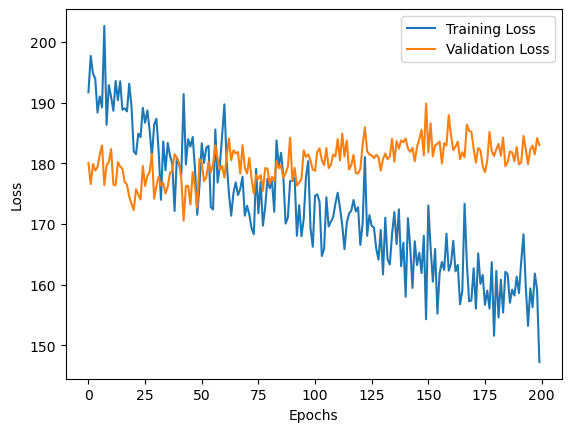

In [48]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [20]:
X = df_clip.drop(target_variable, axis=1)
y = df_clip.loc[:,target_variable]
model_XGBR = Pipeline(steps=[
    ('preprocessor', get_preprocessor(X)),
    ('model', XGBRegressor(**grid_search_XGBR.best_params_))
])
model_XGBR.fit(X,y)

y_pred = model_XGBR.predict(X)

print("R2 score on training set:", r2_score(y, y_pred))

R2 score on training set: 0.8892915844917297


In [21]:
joblib.dump(model_XGBR, 'model_XGBR.pkl')

['model_XGBR.pkl']

In [20]:
X.iloc[0].to_list()

['Citroën',
 140411.0,
 100.0,
 'diesel',
 'black',
 'convertible',
 True,
 True,
 False,
 False,
 True,
 True,
 True]

In [20]:
test_data_X = [X.iloc[0].to_list(), X.iloc[24].to_list()]
columns = X.columns

test_df = pd.DataFrame(test_data_X, columns=columns)

In [22]:
loaded_model = joblib.load('src/model_XGBR.pkl')
loaded_model.predict(test_df)

array([106.42868, 134.32527], dtype=float32)

In [24]:
class CarFeatures(BaseModel) :
    model_key                  :  str
    mileage                    :  float
    engine_power               :  float
    fuel                       :  str
    paint_color                :  str
    car_type                   :  str
    private_parking_available  :  bool
    has_gps                    :  bool
    has_air_conditioning       :  bool
    automatic_car              :  bool
    has_getaround_connect      :  bool
    has_speed_regulator        :  bool
    winter_tires               :  bool

c:\Users\ad98\anaconda3\Lib\site-packages\pydantic\_internal\_fields.py:149: UserWarning:

Field "model_key" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.



In [25]:
test = CarFeatures(**X.iloc[0].to_dict())

In [26]:
test

CarFeatures(model_key='Citroën', mileage=140411.0, engine_power=100.0, fuel='diesel', paint_color='black', car_type='convertible', private_parking_available=True, has_gps=True, has_air_conditioning=False, automatic_car=False, has_getaround_connect=True, has_speed_regulator=True, winter_tires=True)

In [27]:
test.model_dump()

{'model_key': 'Citroën',
 'mileage': 140411.0,
 'engine_power': 100.0,
 'fuel': 'diesel',
 'paint_color': 'black',
 'car_type': 'convertible',
 'private_parking_available': True,
 'has_gps': True,
 'has_air_conditioning': False,
 'automatic_car': False,
 'has_getaround_connect': True,
 'has_speed_regulator': True,
 'winter_tires': True}

In [28]:
pd.DataFrame([test.model_dump()])

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires
0,Citroën,140411.0,100.0,diesel,black,convertible,True,True,False,False,True,True,True


In [29]:
loaded_model.predict(pd.DataFrame([test.model_dump()]))

array([106.42868], dtype=float32)

In [30]:
car_features_list = [CarFeatures(**X.iloc[0].to_dict()), CarFeatures(**X.iloc[24].to_dict())]

In [31]:
pd.DataFrame([Car_features.model_dump() for Car_features in car_features_list]) 

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires
0,Citroën,140411.0,100.0,diesel,black,convertible,True,True,False,False,True,True,True
1,Peugeot,43662.0,180.0,petrol,orange,convertible,True,False,False,False,True,False,True


In [32]:
loaded_model.predict(pd.DataFrame([Car_features.model_dump() for Car_features in car_features_list]) )

array([106.42868, 134.32527], dtype=float32)

In [34]:
import requests 
import json
headers = {
    "Content-Type": "application/json"
}
r = requests.post(url="http://localhost:8000/predict", json=[Car_features.model_dump() for Car_features in car_features_list], headers=headers)

In [35]:
r.status_code

200

In [37]:
r.json()

{'prediction': [106.42868041992188, 134.3252716064453]}

In [41]:
r = requests.post(url="https://adriend-skep-get-around-analysis-project.hf.space/predict", json=[Car_features.model_dump() for Car_features in car_features_list])
r.status_code

200

In [42]:
r.json()

{'prediction': [106.42868041992188, 134.3252716064453]}

In [ ]:
from pydantic import BaseModel
import requests 
import json


class CarFeatures(BaseModel) :
    model_key                  :  str
    mileage                    :  float
    engine_power               :  float
    fuel                       :  str
    paint_color                :  str
    car_type                   :  str
    private_parking_available  :  bool
    has_gps                    :  bool
    has_air_conditioning       :  bool
    automatic_car              :  bool
    has_getaround_connect      :  bool
    has_speed_regulator        :  bool
    winter_tires               :  bool


car_1 = CarFeatures(
    model_key="Citroën", # The car's brand. Options: 'Citroën', 'Peugeot', 'PGO', 'Renault', 'Audi', 'BMW', 'Ford', 'Mercedes', 'Opel', 'Porsche', 'Volkswagen', 'KIA Motors', 'Alfa Romeo', 'Ferrari', 'Fiat', 'Lamborghini', 'Maserati', 'Lexus', 'Honda', 'Mazda', 'Mini', 'Mitsubishi', 'Nissan', 'SEAT', 'Subaru', 'Suzuki', 'Toyota', 'Yamaha'
    mileage=140411.0,
    engine_power=100.0,
    fuel="diesel", # The type of fuel the car uses. Options: 'diesel', 'petrol', 'hybrid_petrol', 'electro'.
    paint_color="black", # The color of the car. Options: 'black', 'grey', 'white', 'red', 'silver', 'blue', 'orange', 'beige', 'brown', 'green'.
    car_type="convertible", # The type of car. Options: 'convertible', 'coupe', 'estate', 'hatchback', 'sedan', 'subcompact', 'suv', 'van'
    private_parking_available=True,
    has_gps=True,
    has_air_conditioning=False,
    automatic_car=False,
    has_getaround_connect=True,
    has_speed_regulator=True,
    winter_tires=True
)

car_2 = CarFeatures(
    model_key="Peugeot",
    mileage=43662.0,
    engine_power=180.0,
    fuel="petrol",
    paint_color="orange",
    car_type="convertible",
    private_parking_available=True,
    has_gps=False,
    has_air_conditioning=False,
    automatic_car=False,
    has_getaround_connect=True,
    has_speed_regulator=False,
    winter_tires=True
)

car_features_list = [car_1, car_2]
r = requests.post(url="https://adriend-skep-getaround-analysis-api.hf.space/predict", json=[Car_features.model_dump() for Car_features in car_features_list])
r.json()

{'prediction': [106.42868041992188, 134.3252716064453]}